In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
print('Tensorflow version:',tf.__version__)

Tensorflow version: 2.8.2


In [ ]:
model=tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet',input_shape=(96,96,3))
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(model.input,model.get_layer(layer_name).output)

def create_image():
  return tf.random.uniform((96,96,3),minval=0,maxval=1)

def plot_image(image,title='random'):
  #image=image-tf.math.reduce._min(image)
  plt.imshow(image)
  plt.title(title)

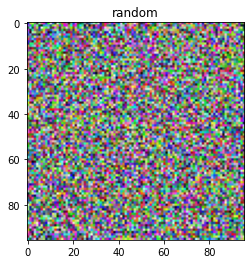

In [ ]:
image=create_image()
plot_image(image)

In [ ]:
def visualize_image(layer_name,f_index=None,epochs=50):
  submodel=get_submodel(layer_name)
  num_filters=submodel.output.shape[-1]

  if f_index is None:
    f_index=random.randint(0,num_filters-1)
  assert num_filters>f_index,'f_index is out of bounds'
  image=create_image()

  for i in range(epochs):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out=submodel(tf.expand_dims(image,axis=0))[:,:,:,f_index]
      loss=tf.math.reduce_mean(out)
    grads=tape.gradient(loss,image)
    grads=tf.math.l2_normalize(grads)
    image+=grads*1

  plot_image(image,f'{layer_name},{f_index}')

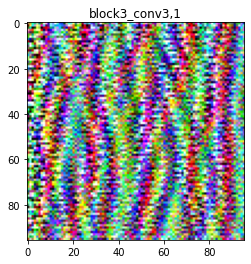

In [ ]:
visualize_image('block3_conv3',f_index=1,epochs=50)

In [ ]:
print([layer for layer in model.layers if 'conv' in layer.name])

[<keras.layers.convolutional.Conv2D object at 0x7f8008e24b50>, <keras.layers.convolutional.Conv2D object at 0x7f8008dcdb10>, <keras.layers.convolutional.Conv2D object at 0x7f800501d710>, <keras.layers.convolutional.Conv2D object at 0x7f8005021b90>, <keras.layers.convolutional.Conv2D object at 0x7f8005030450>, <keras.layers.convolutional.Conv2D object at 0x7f800a5f5bd0>, <keras.layers.convolutional.Conv2D object at 0x7f800503d890>, <keras.layers.convolutional.Conv2D object at 0x7f8005044c90>, <keras.layers.convolutional.Conv2D object at 0x7f800504f150>, <keras.layers.convolutional.Conv2D object at 0x7f8005053490>, <keras.layers.convolutional.Conv2D object at 0x7f800505a810>, <keras.layers.convolutional.Conv2D object at 0x7f8004fe1e50>, <keras.layers.convolutional.Conv2D object at 0x7f8005030950>]
